In [2]:
%pip install xmitgcm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import xmitgcm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from dask.diagnostics import ProgressBar

## Loading the datasets

In [4]:
#Spin Up
data_spinUp = "/gws/nopw/j04/co2clim/uef1/MITgcm/LGM-UF24/TimeVarTair_DiagTracer_SpinUp"
dsSU1 = xmitgcm.open_mdsdataset(data_spinUp, prefix = "dicDiag")
dsSU2 = xmitgcm.open_mdsdataset(data_spinUp, prefix = "Diag4")

In [8]:
#First Four Runs for the 10000 year periodicity
data_FirstFour10000 = "/gws/nopw/j04/co2clim/uef1/MITgcm/LGM-UF24/TimeVarTair_DiagTracer_FirstFourRuns_10000yr"
dsFF100001 = xmitgcm.open_mdsdataset(data_FirstFour10000, prefix = "DiagTracer")
dsFF100002 = xmitgcm.open_mdsdataset(data_FirstFour10000, prefix = "DiagPhys")

In [7]:
#loading the SpinUp files data (the same for all periodicities)
daSUTrach01 = dsSU1['TRAC01'].weighted(dsSU1['rA']*dsSU1['hFacC']).mean(['Z', 'XC', 'YC'])
daSUDIC = dsSU1['DICCARB'].weighted(dsSU1['rA']*dsSU1['hFacC']).mean(['Z', 'XC', 'YC'])
daSUAverageDIC = dsSU1['TRAC01'].isel(Z = 1).weighted(dsSU1['rA']).mean(['XC', 'YC'])
daSUTemp = dsSU2['THETA'].weighted(dsSU2['rA']*dsSU2['hFacC']).mean(['Z', 'XC', 'YC'])
daSUAverageTemp = dsSU2['THETA'].isel(Z = 1).weighted(dsSU1['rA']).mean(['XC', 'YC'])
with ProgressBar(): 
    daSUTrach01 = daSUTrach01.load()
with ProgressBar(): 
    daSUDIC = daSUDIC.load()
with ProgressBar(): 
    daSUAverageDIC = daSUAverageDIC.load()
with ProgressBar(): 
    daSUTemp = daSUTemp.load()
with ProgressBar(): 
    daSUAverageTemp = daSUAverageTemp.load()

[########################################] | 100% Completed | 857.92 ms
[########################################] | 100% Completed | 314.28 ms
[########################################] | 100% Completed | 208.05 ms
[########################################] | 100% Completed | 918.35 ms
[########################################] | 100% Completed | 210.07 ms


# 10000 year periodicity

### Dissolved Inorganic Carbon (DIC) [mol C/m^3] concentration

In [8]:
daFF10000Trach01 = dsFF100001['TRAC01'].weighted(dsFF100001['rA']*dsFF100001['hFacC']).mean(['Z', 'XC', 'YC'])
with ProgressBar(): 
    daFF10000Trach01 = daFF10000Trach01.load()

[########################################] | 100% Completed | 731.40 ms


Text(0.5, 1.0, 'Dissolved Inorganic Carbon (DIC) [mol C/m^3] concentration')

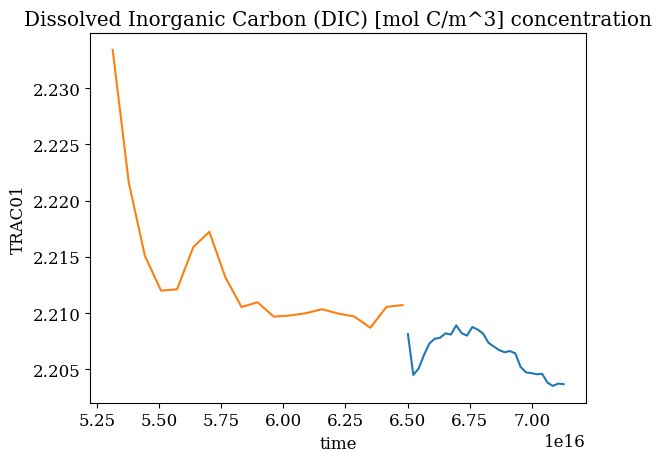

In [9]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
daFF10000Trach01.plot()
daSUTrach01.plot()
plt.title("Dissolved Inorganic Carbon (DIC) [mol C/m^3] concentration")

### Average Dissolved Inorganic Carbon (DIC) [mol C/m^3] concentration¶

In [10]:
daFF10000AverageDIC = dsFF100001['TRAC01'].isel(Z = 1).weighted(dsFF100002['rA']).mean(['XC', 'YC'])
with ProgressBar(): 
    daFF10000AverageDIC = daFF10000AverageDIC.load()

[########################################] | 100% Completed | 423.18 ms


Text(0.5, 1.0, 'Average Dissolved Inorganic Carbon (DIC) [mol C/m^3] concentration')

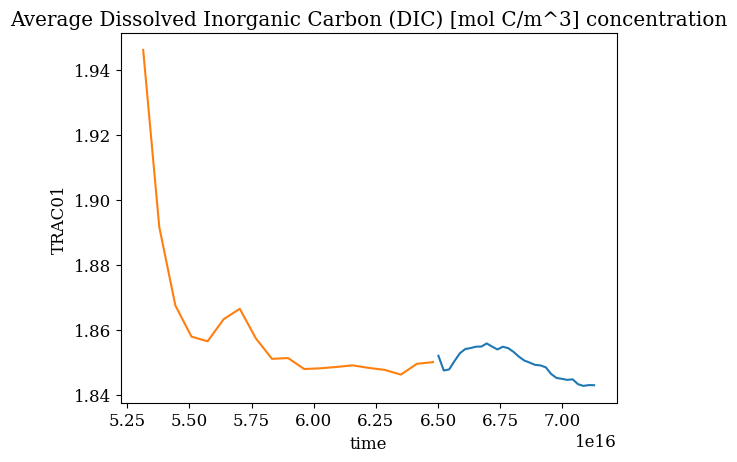

In [11]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
daFF10000AverageDIC.plot()
daSUAverageDIC.plot()
plt.title("Average Dissolved Inorganic Carbon (DIC) [mol C/m^3] concentration")

### Carbonate chg-biol prod and remin (mol eq/m3/s)

In [12]:
daFF10000DIC = dsFF100001['DICCARB'].weighted(dsFF100001['rA']*dsFF100001['hFacC']).mean(['Z', 'XC', 'YC'])
with ProgressBar(): 
    daFF10000DIC = daFF10000DIC.load()

[########################################] | 100% Completed | 527.89 ms


Text(0.5, 1.0, 'Carbonate chg-biol prod and remin (mol eq/m3/s)')

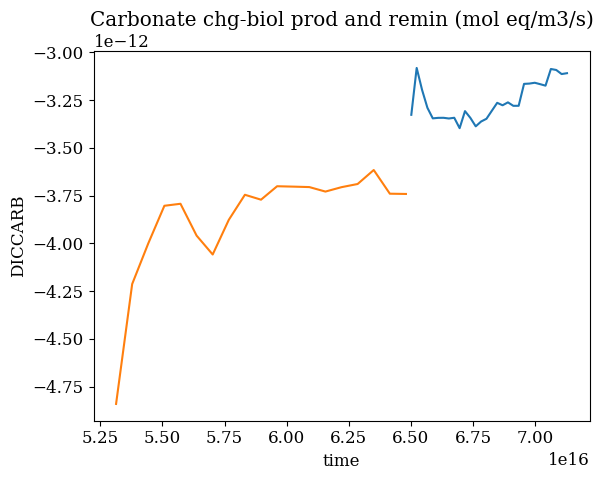

In [13]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
daFF10000DIC.plot()
daSUDIC.plot()
plt.title("Carbonate chg-biol prod and remin (mol eq/m3/s)")

### Potential Temperature [degC]

In [14]:
daFF10000Temp = dsFF100002['THETA'].weighted(dsFF100002['rA']*dsFF100002['hFacC']).mean(['Z', 'XC', 'YC'])
with ProgressBar(): 
    daFF10000Temp = daFF10000Temp.load()

[########################################] | 100% Completed | 623.50 ms


Text(0.5, 1.0, 'Potential Temperature [degC]')

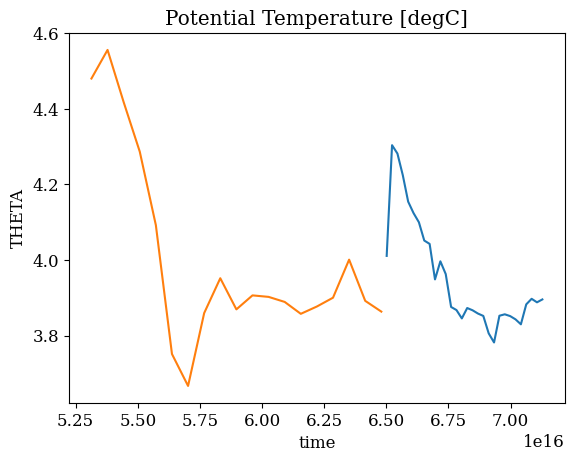

In [15]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
daFF10000Temp.plot()
daSUTemp.plot()
plt.title("Potential Temperature [degC]")

### Average Potential Temperature [degC]

In [17]:
daFF10000AverageTemp = dsFF100002['THETA'].isel(Z=1).weighted(dsFF100002['rA']).mean(['XC', 'YC'])
with ProgressBar(): 
    daFF10000AverageTemp = daFF10000AverageTemp.load()

[########################################] | 100% Completed | 828.14 ms


Text(0.5, 1.0, 'Average Potential Temperature [degC]')

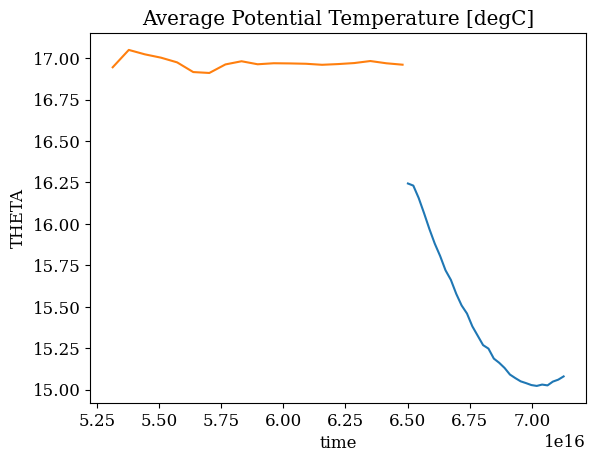

In [18]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
daFF10000AverageTemp.plot()
daSUAverageTemp.plot()
plt.title("Average Potential Temperature [degC]")